In [1]:
# define id (full id account)
INSTANCE_ID = '042dbf75-1db4-48af-aa2c-beee173d3339'  
# aldready inputted into config file. In case you put instance ID into cofniguration file you can leave this unchanged

In [2]:
# option settings
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import datetime
from base64 import b64encode
from ipyleaflet import Map, WMSLayer
from sentinelhub.data_request import WmsRequest, WcsRequest
from sentinelhub.constants import MimeType, CustomUrlParam
from sentinelhub.common import BBox, CRS
from time_lapse import SentinelHubTimelapse
# from sentinelhub import WmsRequest, WcsRequest, MimeType, CRS, BBox, CustomUrlParam, DataSource

##### Function wrapper

If you want to repeat the previous steps systematically, a wrapper function can be created as below.

In [6]:
# define timelampse function
def make_timelapse(msg, bbox, time_interval, *, full_size=(int(1920 / 2), int(1080 / 2)), mask_images=[],
                   max_cc=0.01, scale_factor=0.2, fps=8, instance_id=INSTANCE_ID, layer, **kwargs):
    
    # call timelapse function
    timelapse = SentinelHubTimelapse(msg, bbox, time_interval, instance_id,
                                     full_size=full_size, layer=layer, **kwargs)
    timelapse.get_previews()
    timelapse.save_fullres_images()
    timelapse.plot_preview(filename='previews.pdf')
    timelapse.mask_cloudy_images(max_cloud_coverage=max_cc)
    timelapse.plot_cloud_masks(filename='cloudmasks.pdf')
    timelapse.plot_preview(filename='previews_with_cc.pdf')
    timelapse.mask_images(mask_images)
    timelapse.create_date_stamps()
    timelapse.create_timelapse(scale_factor=scale_factor)

    timelapse.make_gif(fps=fps)
    timelapse.make_video(fps=fps)

### Get Coordinates

In [14]:
# specify centre of map
# view map
m = Map(center=[-3.689013, -79.618821], zoom=15)
m

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map data (c) <a href="https://openstreetmap.org">OpenStreetMap</a> contributors'}, center=[-3.689013, -79.618821], layers=(TileLayer(base=True, max_zoom=19, min_zoom=1, options=['attribution', 'detect_retina', 'max_zoom', 'min_zoom', 'tile_size']),), options=['attribution_control', 'basemap', 'bounce_at_zoom_limits', 'box_zoom', 'center', 'close_popup_on_click', 'double_click_zoom', 'dragging', 'inertia', 'inertia_deceleration', 'inertia_max_speed', 'keyboard', 'keyboard_pan_offset', 'keyboard_zoom_offset', 'max_zoom', 'min_zoom', 'scroll_wheel_zoom', 'tap', 'tap_tolerance', 'touch_zoom', 'world_copy_jump', 'zoom', 'zoom_animation_threshold', 'zoom_control', 'zoom_start'], zoom=15)

In [19]:
# get bounds box
m.bounds

((-3.697591691922549, -79.63984966278078),
 (-3.680461123223407, -79.59774971008302))

In [16]:
# specify wms and time?
sh_wms_url = 'https://services.sentinel-hub.com/ogc/wms/' + INSTANCE_ID + '?showlogo=0&time=2018-04-01/2018-05-18'

In [18]:
# define layer
m.add_layer(WMSLayer(url=sh_wms_url, layers="TRUE_COLOR", tile_size=512))

### Timelapse

INFO:time_lapse:Found 75 images of timelapse_dir/location_id6_AGRICULTRUE between 2015-01-01 and 2018-05-18.
INFO:time_lapse:
I suggest you start by downloading previews first to see,
if BBOX is OK, images are usefull, etc...
Execute get_previews() method on your object.

INFO:time_lapse:75 previews have been downloaded and stored to numpy array of shape (75, 256, 455, 3).
INFO:time_lapse:Downloading cloud data and running cloud detection. This may take a while.


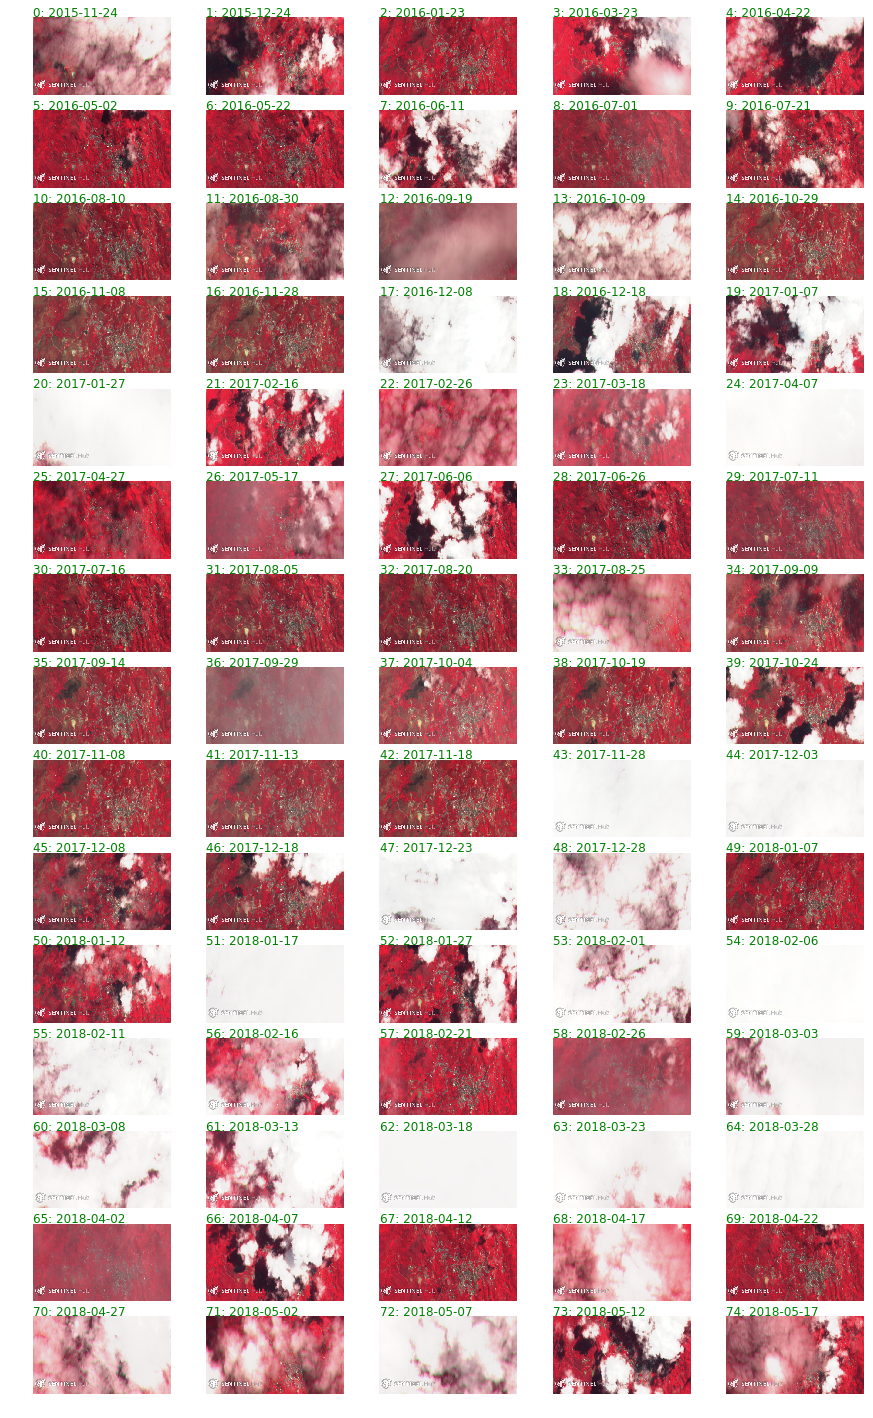

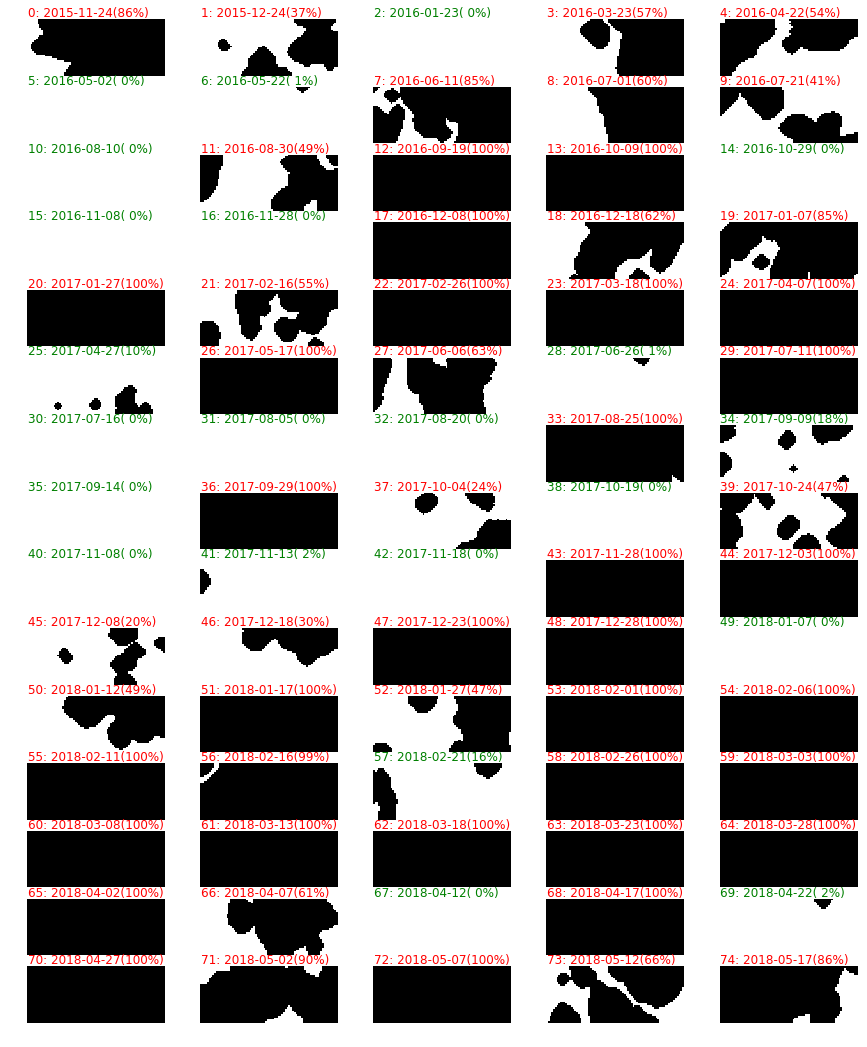

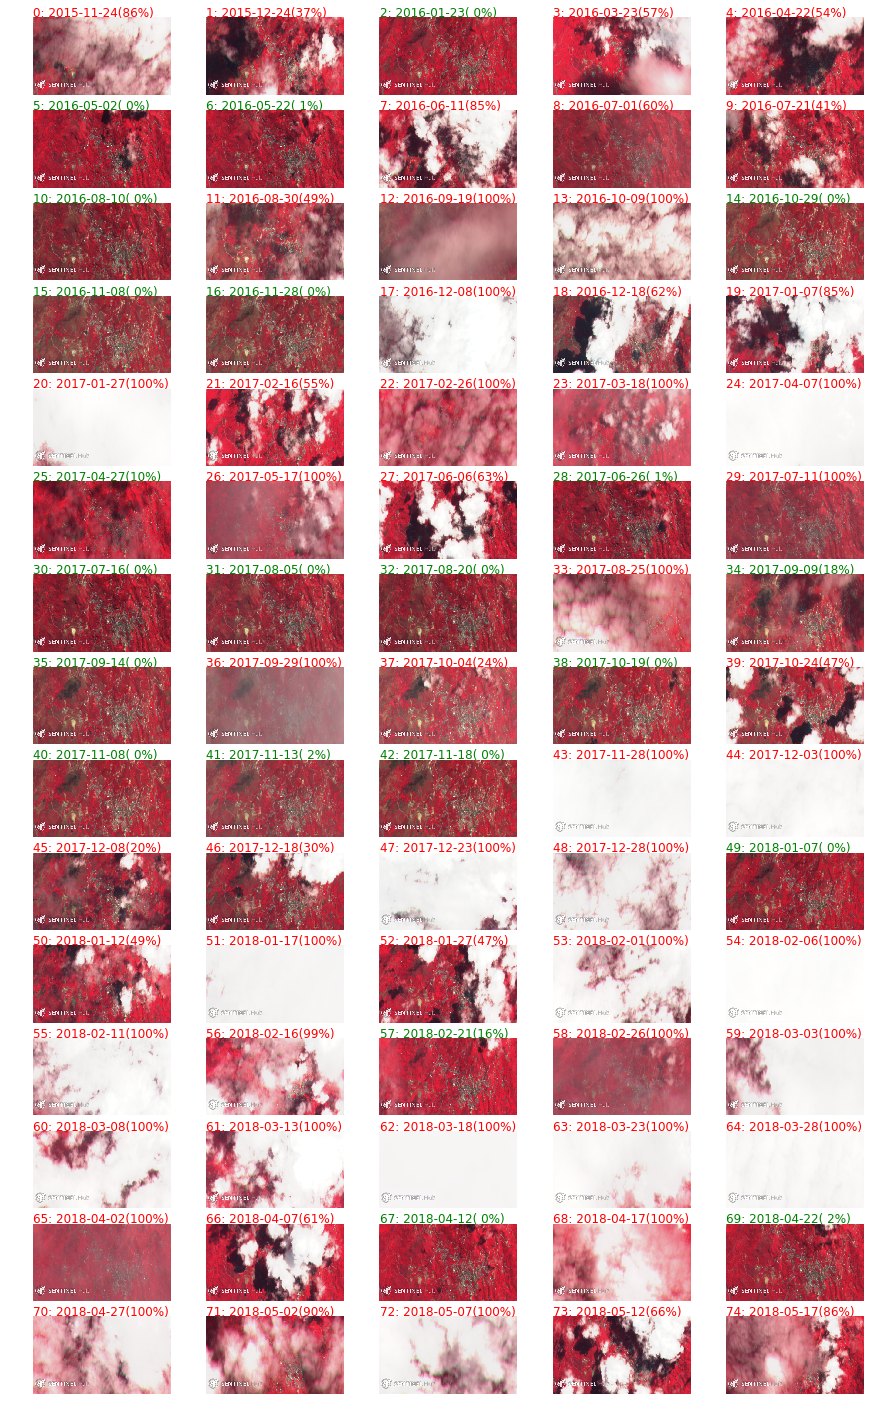

In [22]:
# coordinates
first_landslide = BBox(bbox=([m.bounds[0][1], m.bounds[0][0],
                              m.bounds[1][1], m.bounds[1][0]]), crs=CRS.WGS84)

# name of landslide
landslide_name = 'timelapse_dir/location_id6_FALSE_COLOR'

# time interval
time_interval = ['2015-01-01', '2018-05-18']

# define layer
layer = 'FALSE_COLOR'

# max cloud cover thres
cc_thres = 0.2

# size
tl_size = (int(1920/2), int(1080/2))

# mask index -> manually choose images
# mask_idxs = [7, 96, 112, 170, 186, 190]


# execute timelapse 
make_timelapse(msg=landslide_name,
               bbox=first_landslide,
               time_interval=time_interval,
               max_cc=cc_thres,
               layer=layer,
               scale_factor=0.2)